# StartUp

Now that we've seen most of our foundational pieces, we can do the "common startup tasks" that we will usually need in a notebook (or in a script file).

In [2]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

from utilities import my_show, my_gshow, my_read, my_read_g, my_read_cg

img_dir = 'common/'

%matplotlib inline

In [3]:
cv2.threshold

<function threshold>

You'll notice that we also imported some names from a `utilities.py` file.  Basically, we took the code for those functions from the Week_01 notebook and put them in a module.  This is a *really good idea*.  Why?  Primarily because of D-R-Y:  don't repeat yourself.  Cutting and pasting that code into many different scripts and into cells in notebooks leads to massive inefficiency.  Imagine if the code has been duplicated by cut-n-paste in five different places.  Now, when you want to update it (add a new feature, fix a bug, add unit tests) you have to track down all five locations and repeatedly fix them.  With the code in a re-used module, you minimize this sort of repeated effort.  For the record, here's what `utilities.py` looks like.

In [4]:
!cat utilities.py  # you can also use !cat (unix-y) or !more (windows-y)

import matplotlib.pyplot as plt
import cv2

def my_show(ax, img, title=None, interpolation='bicubic', **kwargs):
    ' helper to display an image on an axes without grid/spine '
    ax.imshow(img, interpolation = interpolation, **kwargs)
    ax.axis('off')
    if title:
        ax.set_title(title)

def my_gshow(ax, img, title=None, cmap='gray', interpolation='bicubic', **kwargs):
    ' helper to display an image, in grayscale, on an axes without grid/spine '
    my_show(ax, img, title=title, cmap='gray', interpolation=interpolation, **kwargs)

def my_read(filename):
    ' read from an image file to an rgb '
    img = cv2.imread(filename)
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def my_read_g(filename):
    ' read from an image file to an rgb '
    gray = cv2.imread(filename, 0)
    return gray


def my_read_cg(filename):
    ' read from an image file to an rgb and a grayscale image array '
    rgb = my_read(filename)
    gray = cv2.cvtColor(rgb, cv2.COLOR_RGB2GRAY)
    return r

# CV2 Arithmetic

In [5]:
# unit8 / c unsigned 8-bit int - addition results in wrapping/modulo/clocklike arithmetic
np.uint8([100]) + np.uint8([200]), 300 - 2**8, 300 % 2**8

(array([44], dtype=uint8), 44, 44)

In [6]:
# cv2 operations are a bit different.  they perform "clipping"  
cv2.add(np.uint8([100]), np.uint8([200]))

array([[255]], dtype=uint8)

In [7]:
# this is simlar to the far more complicated (and memory consuming)
# 1.  upconvert (to a type that won't overflow) 2. clipped addition 3. downconvert
arr1, arr2 = np.uint8([100]), np.uint8([200])
np.clip(arr1.astype(np.uint16) + arr2.astype(np.uint16), 0, 255)

array([255], dtype=uint16)

# Image Merging

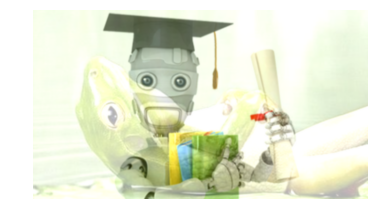

In [83]:
ml   = my_read(img_dir+'data/ml.png')
frog = my_read(img_dir+'data/frog.jpg')

min_r, min_c = (min(ml.shape[0], frog.shape[0]), 
                min(ml.shape[1], frog.shape[1]))

# blending of two images:
# by:  img1 * wgt1 + img2 * wgt2 + wgt3
#      addWeights(img1, wgt1, img2, wgt2, wgt3)
dst = cv2.addWeighted(  ml[:min_r, :min_c], 0.7,
                      frog[:min_r, :min_c], 0.5, 0)
my_show(plt.gca(), dst)


In [12]:
# place logo in corner of messi
logo, messi = map(my_read, [img_dir+'data/opencv-logo.png', img_dir+'data/messi.jpg'])

# technique for creating slices programmatically
# i.e., create code that does indexing/slicing in arr[:, a:b, :c]
shape = logo.shape[:-1]
corner = [slice(0,n) for n in shape] + [slice(None)]  # fancy:  [:logo.shape[0], :logo.shape[1], :]
print(corner)

[slice(0, 240, None), slice(0, 195, None), slice(None, None, None)]


/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """Entry point for launching an IPython kernel.


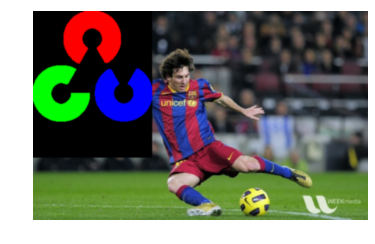

In [13]:
messi[corner] = logo
my_show(plt.gca(), messi)

### Interpolation visualization

[[1. 0. 0.]
 [0. 1. 1.]
 [0. 0. 1.]]


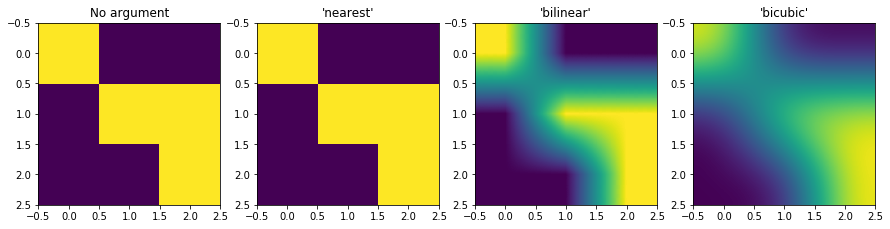

In [19]:
img = np.eye(3)
img[1,2] = 1

print(img)

fig, axes = plt.subplots(1, 4, figsize=(15, 5))
axes[0].imshow(img)
axes[0].set_title("No argument")
methods = ['nearest', 'bilinear', 'bicubic']
for idx, method in enumerate(methods, 1):
    axes[idx].imshow(img, interpolation=method)
    axes[idx].set_title(f'{repr(method)}')

# Dealing with Colorspaces

In [20]:
# opencv color converters
import itertools as it

def grouper(iterable, n, fillvalue=None):
    ' helper that make n-len groups out of iterable; last is padded with fillvalue'
    args = [iter(iterable)] * n # repeated refs, so no duplicates, all advance
    return it.zip_longest(*args, fillvalue=fillvalue)

color_names = (i for i in dir(cv2) if i.startswith('COLOR_BGR'))
print("\n".join(str(g) for g in grouper(color_names, 3)))

('COLOR_BGR2BGR555', 'COLOR_BGR2BGR565', 'COLOR_BGR2BGRA')
('COLOR_BGR2GRAY', 'COLOR_BGR2HLS', 'COLOR_BGR2HLS_FULL')
('COLOR_BGR2HSV', 'COLOR_BGR2HSV_FULL', 'COLOR_BGR2LAB')
('COLOR_BGR2LUV', 'COLOR_BGR2Lab', 'COLOR_BGR2Luv')
('COLOR_BGR2RGB', 'COLOR_BGR2RGBA', 'COLOR_BGR2XYZ')
('COLOR_BGR2YCR_CB', 'COLOR_BGR2YCrCb', 'COLOR_BGR2YUV')
('COLOR_BGR2YUV_I420', 'COLOR_BGR2YUV_IYUV', 'COLOR_BGR2YUV_YV12')
('COLOR_BGR5552BGR', 'COLOR_BGR5552BGRA', 'COLOR_BGR5552GRAY')
('COLOR_BGR5552RGB', 'COLOR_BGR5552RGBA', 'COLOR_BGR5652BGR')
('COLOR_BGR5652BGRA', 'COLOR_BGR5652GRAY', 'COLOR_BGR5652RGB')
('COLOR_BGR5652RGBA', 'COLOR_BGRA2BGR', 'COLOR_BGRA2BGR555')
('COLOR_BGRA2BGR565', 'COLOR_BGRA2GRAY', 'COLOR_BGRA2RGB')
('COLOR_BGRA2RGBA', 'COLOR_BGRA2YUV_I420', 'COLOR_BGRA2YUV_IYUV')
('COLOR_BGRA2YUV_YV12', None, None)


## RGB and Grayscale

In [21]:
# arange gets 0:255
# [] * 3 gets 3 channels
# meshgrid gets cross product (cartesian product) of all possibilities
# stack gets 256x256x256x3 array of these (-1 makes it on inner most dimension)
# reshape (-1,ndim) gets them into num-of-input-arrays columns
def cartesian_product(*arrays):
    ' helper to generate flattened cross-product (combinations) from sequence of arrays '
    ndim = len(arrays)
    return np.stack(np.meshgrid(*arrays), axis=-1).reshape(-1, ndim)    

base, dims = np.arange(256), 3
print(cartesian_product(*[base]*3).shape,
      np.stack(np.meshgrid(*[base]*dims), axis=-1).reshape(-1,dims).shape)

(16777216, 3) (16777216, 3)


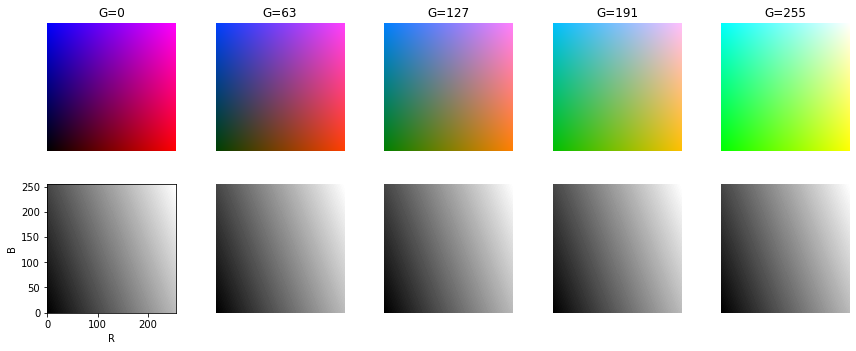

In [22]:
R,G,B = 0,1,2

rb = cartesian_product(np.arange(256), np.arange(256)).reshape(256,256,2)
# if that's too mind blowing, here's a less general version:
# rb = np.stack(np.meshgrid(np.arange(256), np.arange(256)), axis=-1)

fig, axes = plt.subplots(2,5,figsize=(12,5))
axes_it = axes.T.flat
for g in [0,63,127,191,255]:
    # create panel of rgb panels:  start with g, add rb
    rgb = np.full((256,256,3), g, dtype=np.uint8)
    rgb[:,:,[R,B]] = rb 

    # show color plot
    ax = next(axes_it)
    my_show(ax, rgb, origin='lower', interpolation=None)
    ax.set_title('G={}'.format(g))
    
    # create and show grays
    gray = cv2.cvtColor(rgb,cv2.COLOR_RGB2GRAY)
    my_gshow(next(axes_it), gray, origin='lower', interpolation=None)

axes[1,0].axis('on')
axes[1,0].set_xlabel('R')
axes[1,0].set_ylabel('B')

fig.tight_layout()

## RGB and HSV

In OpenCV:

>For HSV, Hue range is [0,179], Saturation range is [0,255] and Value range is [0,255]. Different softwares use different scales. So if you are comparing OpenCV values with them, you need to normalize these ranges.

And, recall from the slides, a few general notes about the HSV colorspace:
  * V/S trade off black/white
  * in cone models, s is white is distance from cone axis
  * v is black is distance from cone point towards the ice cream
  * hue walks around a circle of colors (can map from $[0.0,2\pi]$ to $[0,179]$)


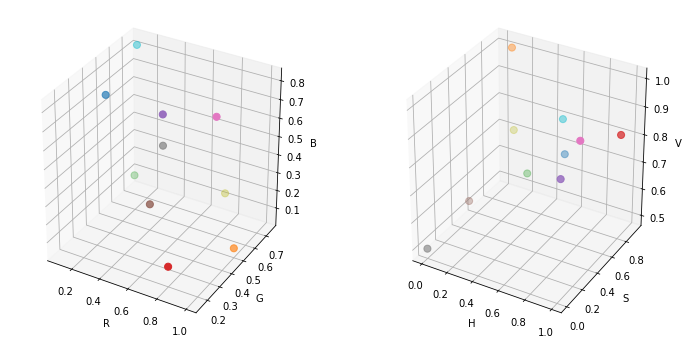

In [24]:
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import axes3d, Axes3D # needed for projection=3d

rgb_pts = np.empty((len(colors.TABLEAU_COLORS),3))
hsv_pts = np.empty((len(colors.TABLEAU_COLORS),3))
for idx, name in enumerate(colors.TABLEAU_COLORS):
    # we'll look into the color names more in  a few minutes
    rgb = colors.to_rgb(c=name)
    hsv = colors.rgb_to_hsv(rgb)

    rgb_pts[idx]=rgb
    hsv_pts[idx]=hsv


fig,axes = plt.subplots(1,2, subplot_kw={'projection':'3d'}, figsize=(12,6))
for ax, pts, labels in zip(axes,
                           [rgb_pts, hsv_pts],
                           [list("RGB"), list("HSV")]):
    seperated = list(zip(*pts))
    ax.scatter3D(*seperated, c=rgb_pts, s=50)
    ax.set_xlabel(labels[0]); ax.set_ylabel(labels[1]); ax.set_zlabel(labels[2])

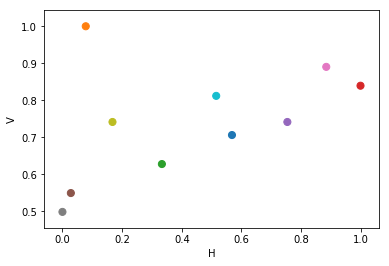

In [25]:
# interesting note:  saturations are mostly pretty high (>.8)
#                    one near .5 and .05

# we can "unroll" the cone to 2D using a constant saturation 
# this projection "flattens" the view from the front-left face of the 3D cube
ax = plt.gca()
# hsv_pts[:,1] = np.mean(hsv_pts[:,1]) # use mean as our slice
ax.scatter(hsv_pts[:,0], hsv_pts[:,2], c=rgb_pts, s=50) # s here is size arg.
#ax.set_xlim(-.05,1.05)
#ax.set_ylim(-.05,1.05)
ax.set_xlabel('H')
ax.set_ylabel('V');

## Selecting by Color

In [26]:
# color by name from matplotlib
from matplotlib import colors as mcolors

def cv2_rgb_to_hsv(rgb):
    ' use cv2 to convert an rgb value to an hsv value '
    rgb = rgb.reshape(1,1,-1)             # ugly, fake a 1 pixel image
    hsv = cv2.cvtColor(rgb, cv2.COLOR_RGB2HSV)[0,0] # undo "fake" image
    return hsv

np.set_printoptions(precision=4)

color_name = 'lightsalmon'
mpl_rgba = np.float64(mcolors.to_rgba(color_name))
mpl_hsv = mcolors.rgb_to_hsv(mpl_rgba[:-1])
print("mpl values: ", mpl_rgba, mpl_hsv)

cv2_rgb = np.uint8(mpl_rgba[:-1] * 255)  # map [0.0,1.0] -> [0,255]
cv2_hsv = cv2_rgb_to_hsv(cv2_rgb)
print("cv2 values: ", cv2_rgb, cv2_hsv)
print("manual conversion (mpl->cv2):", np.round(mpl_hsv * [180,255,255]))

mpl values:  [1.     0.6275 0.4784 1.    ] [0.0476 0.5216 1.    ]
cv2 values:  [255 160 122] [  9 133 255]
manual conversion (mpl->cv2): [  9. 133. 255.]


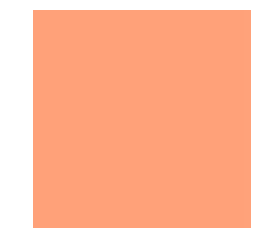

In [27]:
pixel = cv2_hsv
img_hsv = np.tile(pixel, (300,300,1))
img_rgb = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB)
my_show(plt.gca(), img_rgb)

# Masking by Color

In [28]:
def track_blue(frame):
    hsv = cv2.cvtColor(frame, cv2.COLOR_RGB2HSV)

    rgb_blue = np.array([0,0,255]).astype(np.uint8).reshape(1,1,-1)
    hsv_blue_mid = cv2.cvtColor(rgb_blue, cv2.COLOR_RGB2HSV)
    h_blue,_,_ = hsv_blue_mid.flatten()

    lwr_blue = np.array([h_blue-10,  50,  50]).astype(np.uint8)
    upr_blue = np.array([h_blue+10, 255, 255]).astype(np.uint8)

    mask = cv2.inRange(hsv, lwr_blue, upr_blue)

    # Bitwise-AND mask and original image
    res = cv2.bitwise_and(frame, frame, mask=mask)
    return res

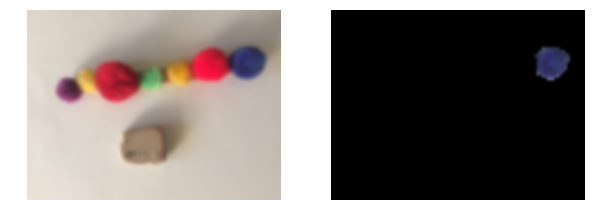

In [30]:
colorful = my_read(img_dir+"data/fuzzyballs2.png")
selected = track_blue(colorful)

fig, axes = plt.subplots(1,2,figsize=(10,5))
my_show(axes[0], colorful)
my_show(axes[1], selected)

# Histograms

In [31]:
apple = my_read_g(img_dir+'data/apple.png')
hist = cv2.calcHist([apple], [0], None, [256], [0,256]) # src imgs, color channels, mask
                                                        # num bins, range (half-open-right interval)
print(hist.shape)
hist[[0,128,164,255]]

(256, 1)


array([[  0.],
       [674.],
       [246.],
       [  0.]], dtype=float32)

In [32]:
hist, bins = np.histogram(apple, 256, [0,255]) # note: closed interval
print(hist.shape)
hist[[0,128,164,255]]

(256,)


array([  0, 674, 246,   0])

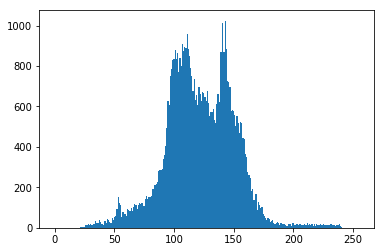

In [33]:
# use precomputed bin counts
plt.hist(range(256), weights=hist, bins=256);

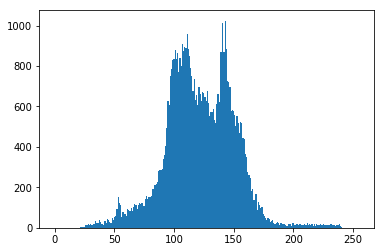

In [34]:
plt.hist(apple.ravel(), 256, [0,255]); # or flatten and let plt.hist do the work

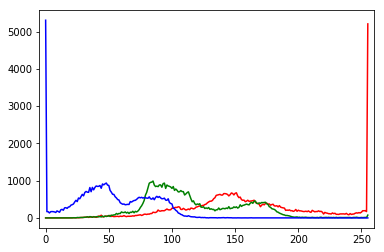

In [35]:
apple = my_read(img_dir+'data/apple.png')
# docs (for C++) imply you can do multiple channels at a time, but it fails :(
for idx, color in enumerate(['r', 'g', 'b']):
    hist = cv2.calcHist([apple],[idx],None,[256],[0,256])
    plt.plot(hist, color = color)
    plt.xlim([-5,260])
    
# lots of red.  not too surprising.

## Histogram Equalization

min: 16 max: 241
min: 125 max: 175
min: 0 max: 255


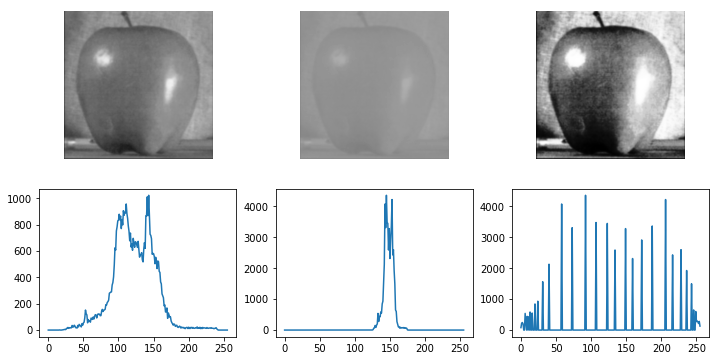

In [36]:
apple = my_read_g(img_dir+'data/apple.png')

# reduce contrast (squash intensities)
# new min:  100, new max: 175
new = np.interp(apple, [apple.min(), apple.max()], [125, 175]).astype(np.uint8)

# equalize using CDF technique
equalized = cv2.equalizeHist(new)

fig, axes = plt.subplots(2,3,figsize=(12,6))
for idx, an_apple in enumerate([apple, new, equalized]):
    # vmin/vmax set enforced min/max gray scale values ... without them
    # 125 -> 0 ... 175 --> 255 and linearly interpolated
    print("min: {} max: {}".format(an_apple.min(), an_apple.max()))
    my_gshow(axes[0, idx], an_apple, vmin=0, vmax=255)    
    hist = cv2.calcHist([an_apple], [0], None, [256], [0,256])
    axes[1,idx].plot(hist)


In [37]:
# compare there methods of normalizing wrt the CDF

def method1(img):
    hist,_ = np.histogram(img,256,[0,256])
    cdf = hist.cumsum()

    mask = cdf!=0
    cdf_nz = cdf[mask]
    mn, mx = cdf_nz.min(), cdf_nz.max()

    cdf[mask] = (cdf_nz - mn) * 255 / (mx - mn)
    return cdf[img]

def method2(img):
    hist,_ = np.histogram(img,256,[0,256])
    cdf = hist.cumsum()

    mask = cdf!=0
    cdf_nz = cdf[mask]
    mn, mx = cdf_nz.min(), cdf_nz.max()

    cdf[mask] = np.interp(cdf_nz, [mn, mx], [0,255])
    return cdf[img]

def method3(img):
    hist,_ = np.histogram(new,256,[0,256])
    cdf = hist.cumsum()

    # from website:  we can get away with filling zeros in the lookup table
    # because no pixel has those value (so it never needs to be looked up)
    cdf_m = np.ma.masked_equal(cdf,0)
    cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
    cdf = np.ma.filled(cdf_m,0).astype('uint8')

    return cdf[img]


All Similar Results? True


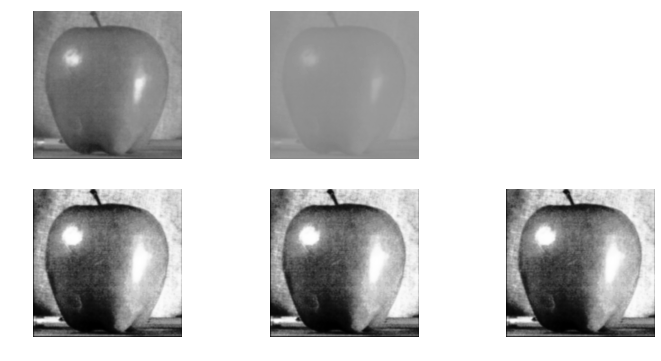

In [38]:
fig, axes = plt.subplots(2,3,figsize=(12,6))

apple = my_read_g(img_dir+'data/apple.png')
new = np.interp(apple, [apple.min(), apple.max()], [125, 175]).astype(np.uint8)

other_args = {"vmin":0, "vmax":255, 'cmap':'gray'}

my_show(axes[0,0], apple, **other_args)
my_show(axes[0,1], new, **other_args)
axes[0,2].set_visible(False)

results = []
for idx, method in enumerate([method1, method2, method3], 0):
    my_show(axes[1,idx], method(new), **other_args)
    results.append(method(new))

print("All Similar Results?", 
      all([np.allclose(results[0], results[1]), 
           np.allclose(results[0], results[2])]))

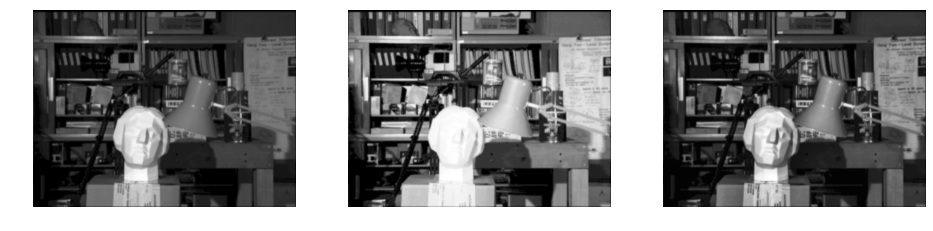

In [39]:
# histogram normalization makes low values lower and high values higher
# --> outliers *get worse*!

# contrast limited adaptive hist. equal.
multi = my_read_g(img_dir+'data/tsukuba.png')
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_equal = clahe.apply(multi)

global_equal = cv2.equalizeHist(multi)


fig,axes = plt.subplots(1,3,figsize=(16,4))

other_args = {"vmin":0, "vmax":255, 'cmap':'gray'}
my_show(axes[0], multi, **other_args)
my_show(axes[1], global_equal, **other_args)
my_show(axes[2], clahe_equal,  **other_args)

## 2D Histograms

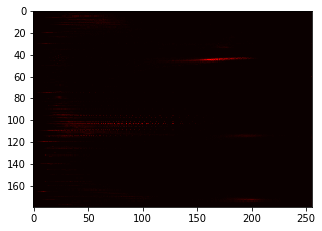

In [40]:
messi = my_read(img_dir+'data/messi.jpg')
messi_hsv = cv2.cvtColor(messi, cv2.COLOR_RGB2HSV)
hist  = cv2.calcHist([messi_hsv], [0, 1], None, [180, 256], [0, 180, 0, 256])

# this is ... not ... great
plt.figure(figsize=(5,5))
plt.imshow(hist, interpolation='nearest', cmap='hot');

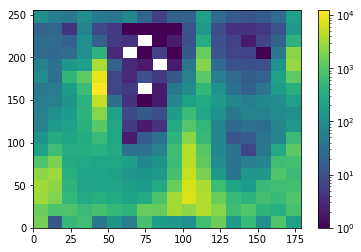

In [41]:
from matplotlib.colors import LogNorm as mpl_LogNorm

h,s,v = cv2.split(messi_hsv)
#_,_,_,cb_img = plt.hist2d(h.ravel(),s.ravel(),18)
# log scale let's small values stand out more wrt big values
_,_,_,cb_img = plt.hist2d(h.ravel(),s.ravel(),18, norm=mpl_LogNorm());
plt.colorbar(cb_img);

# Image Thresholding

## Foreground and Background

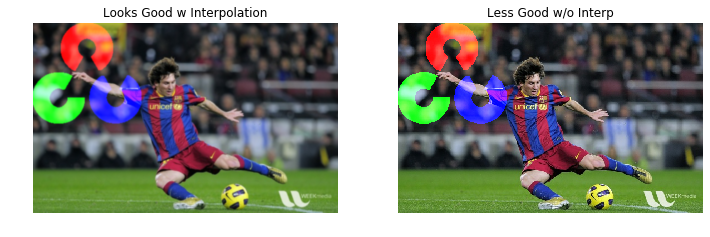

In [42]:
# let's be more subtle
logo, messi = map(my_read, [img_dir+'data/opencv-logo.png', img_dir+'data/messi.jpg'])
logo_fg = np.where(logo > 0)

fig, axes = plt.subplots(1,2,figsize=(12,6))

messi[logo_fg] = logo[logo_fg]
my_show(axes[0], messi, title="Looks Good w Interpolation")
my_show(axes[1], messi, interpolation=None, title="Less Good w/o Interp")

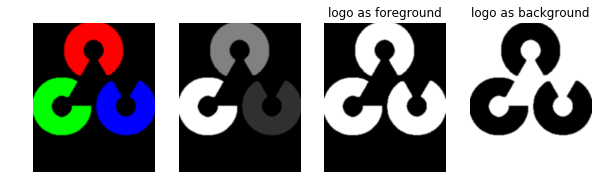

In [43]:
logo  = my_read(img_dir+'data/opencv-logo.png')
messi = my_read(img_dir+'data/messi.jpg')


# we were lucky, opencv logo was "on" or "off".
# more generally, but not most generally, we can threshold
# we'll dive into this in more detail shortly
logo_gray = cv2.cvtColor(logo,cv2.COLOR_RGB2GRAY)
ret, mask = cv2.threshold(logo_gray, 10, 255, cv2.THRESH_BINARY)
mask_inv  = cv2.bitwise_not(mask)

fig, axes = plt.subplots(1,4,figsize=(10,4))

my_show(axes[0], logo)
my_gshow(axes[1], logo_gray)
my_gshow(axes[2], mask, title='logo as foreground')
my_gshow(axes[3], mask_inv, title='logo as background')

In [44]:
messi_roi = messi[:logo.shape[0], :logo.shape[1]]

In [45]:
print(messi_roi.shape, mask_inv.shape, sep='\n')

(240, 195, 3)
(240, 195)


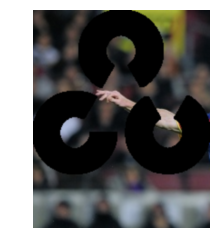

In [46]:
# create image as background + foreground

# background is messi where there isn't logo

# create background from messi
# logo  "on" --> messi off --> drop messi pixel
# logo "off" --> messi on  --> grab messi pixel

# this is convenient, compared to logical ops with array and mask of different kinds
# mask-ed points go to zero
bg = cv2.bitwise_and(messi_roi, messi_roi, mask=mask_inv)
my_show(plt.gca(), bg)

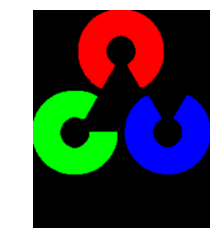

In [47]:
# foreground is from the logo
# logo 'on' --> want this pixel
fg = cv2.bitwise_and(logo, logo, mask=mask)
my_show(plt.gca(), fg)

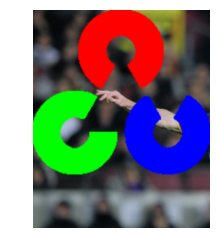

In [48]:
# pretty direct ... only one pixel from fg/bg is "on" at any given position
# b/c of our masking
combined = cv2.add(bg, fg)
my_show(plt.gca(), combined)

In [49]:
# compare to:
(logo>10).shape  # this is channel by channel

(240, 195, 3)

In [50]:
# so, let's get that effect without having to convert channels:
active_roi = (logo>10).any(axis=2)
silent_roi = np.logical_not(active_roi)
active_roi.shape

(240, 195)

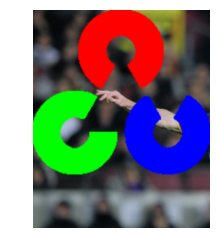

In [51]:
# alternative to np.newaxis:  np.expand_dims(mask_inv, -1)
fg = np.bitwise_and(logo, mask[:,:,np.newaxis])
bg = np.bitwise_and(messi_roi, mask_inv[:,:,np.newaxis])
combined = cv2.add(bg, fg)
my_show(plt.gca(), combined)

## Global Thresholding Methods

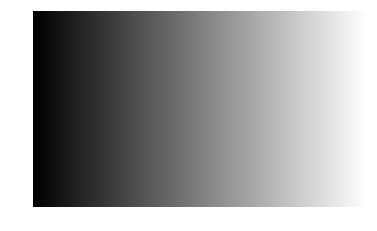

In [52]:
# create a simple gradient

# this also works, but tile seems nicer
# gradient = (np.zeros((300, 256*2), dtype=np.uint8) + 
#             np.repeat(np.arange(0,256, dtype=np.uint8),2))

# repeat to get 0,0,1,1,2,2,3,3,...,... then tile it for horizontals
one_row = np.repeat(np.arange(0,256, dtype=np.uint8),2)
gradient = np.tile(one_row, (300,1))
my_show(plt.gca(), gradient, cmap='gray')

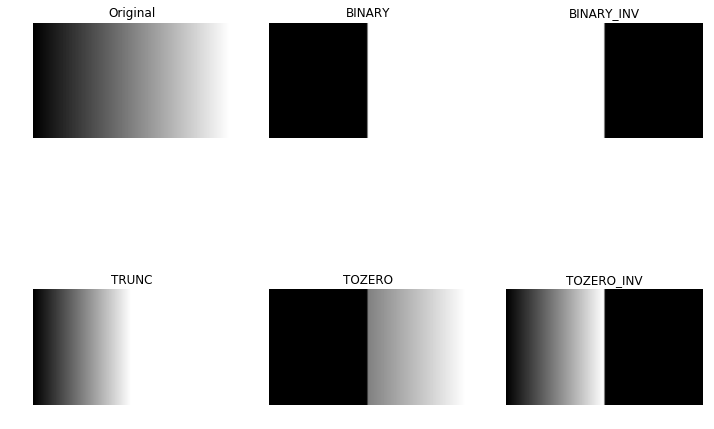

In [53]:
methods = [cv2.THRESH_BINARY, cv2.THRESH_BINARY_INV, cv2.THRESH_TRUNC,
           cv2.THRESH_TOZERO, cv2.THRESH_TOZERO_INV]
titles = ['BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']

fig, axes = plt.subplots(2,3,figsize=(12,9))
axes = axes.flat

ax = next(axes)
my_show(ax, gradient, cmap='gray')           
ax.set_title("Original")

for m, t, ax in zip(methods, titles, axes):
    # src, midpoint, > map to, method
    _, res = cv2.threshold(gradient,127,255,m)
    my_show(ax, res, cmap='gray')
    ax.set_title(t)

## Neighborhood-Sensitive Methods

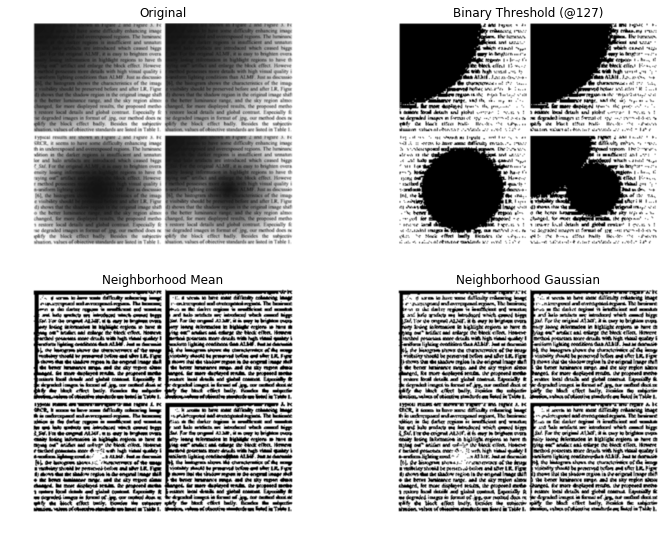

In [54]:
fig, axes = plt.subplots(2,2,figsize=(12,9))
axes = axes.flat

uneven = cv2.imread(img_dir+'data/uneven-illumination.png',0)
ax = next(axes)
my_show(ax, uneven, cmap='gray')           
ax.set_title("Original")

_, bin_th = cv2.threshold(uneven,127,255,cv2.THRESH_BINARY)
ax = next(axes)
my_show(ax, bin_th, cmap='gray')           
ax.set_title("Binary Threshold (@127)")

methods = [cv2.ADAPTIVE_THRESH_MEAN_C, cv2.ADAPTIVE_THRESH_GAUSSIAN_C]
titles  = ["Neighborhood Mean", "Neighborhood Gaussian"]

for m, t, ax in zip(methods, titles, axes):
    # src, midpoint, > map to, method
    res = cv2.adaptiveThreshold(uneven,255,m, 
                                cv2.THRESH_BINARY, # or BIN_INV
                                11, # neighborhood size (11x11),
                                2) # value subtracted from mean/gauss sum before comparison
    my_show(ax, res, cmap='gray')
    ax.set_title(t)

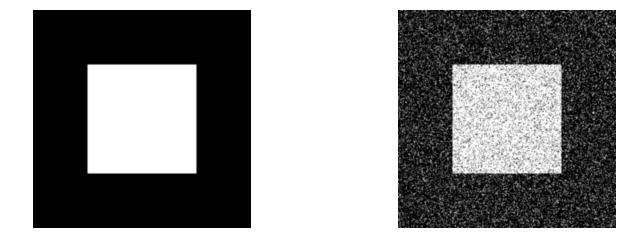

In [55]:
fig,axes = plt.subplots(1,2,figsize=(12,4))
axes = axes.flat

shape = (300,300)

orig = np.zeros(shape, dtype=np.uint8)
orig[75:225, 75:225] = 255
my_show(next(axes), orig, cmap='gray')

# not ultra efficient ... but it works
# (note)
blur = np.random.randint(0,256,size=shape).astype(np.uint8)
blurred = np.where(np.random.uniform(size=shape) > .3, orig, blur)
my_show(next(axes), blurred, cmap='gray')

## Otsu's Method

Here's a very nice presentation of Otsu's method:
  * http://www.labbookpages.co.uk/software/imgProc/otsuThreshold.html

Optimal Thresh is 116.0
Optimal Thresh is 126.0


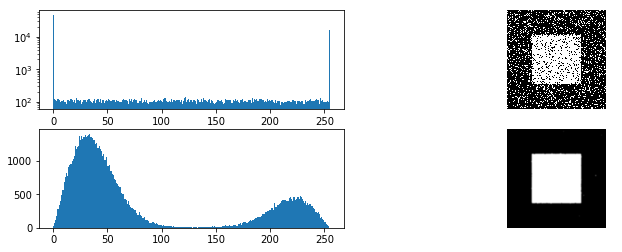

In [56]:
fig,axes = plt.subplots(2,2,figsize=(12,4))
axes = axes.flat

# Otsu's thresholding
next(axes).hist(blurred.flatten(), 256, log=True)
# this seems weird:  shouldn't it be black and white?!?
thresh, th_otsu = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print("Optimal Thresh is", thresh)
my_show(next(axes), th_otsu, cmap='gray', interpolation=None) # force us to see what's there!

reblurred = cv2.GaussianBlur(blurred, (5,5), 0) # neighborhood, variance?
next(axes).hist(reblurred.flatten(), 256);
thresh, th_otsu = cv2.threshold(reblurred, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print("Optimal Thresh is", thresh)
my_show(next(axes), th_otsu, cmap='gray')# also: interpolation=None)

# Geometric Transformations of Images

In [57]:
def size_me(img):
    ' given 80dpi, find size of image in inches from pixel dims '
    dpi = 80
    height, width, *depth = img.shape
    figsize = width / float(dpi), height / float(dpi)
    return figsize

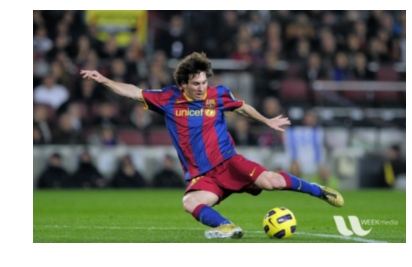

In [58]:
messi = my_read(img_dir+'data/messi.jpg')
fig, ax = plt.subplots(1,1,figsize=size_me(messi))
my_show(ax, messi)

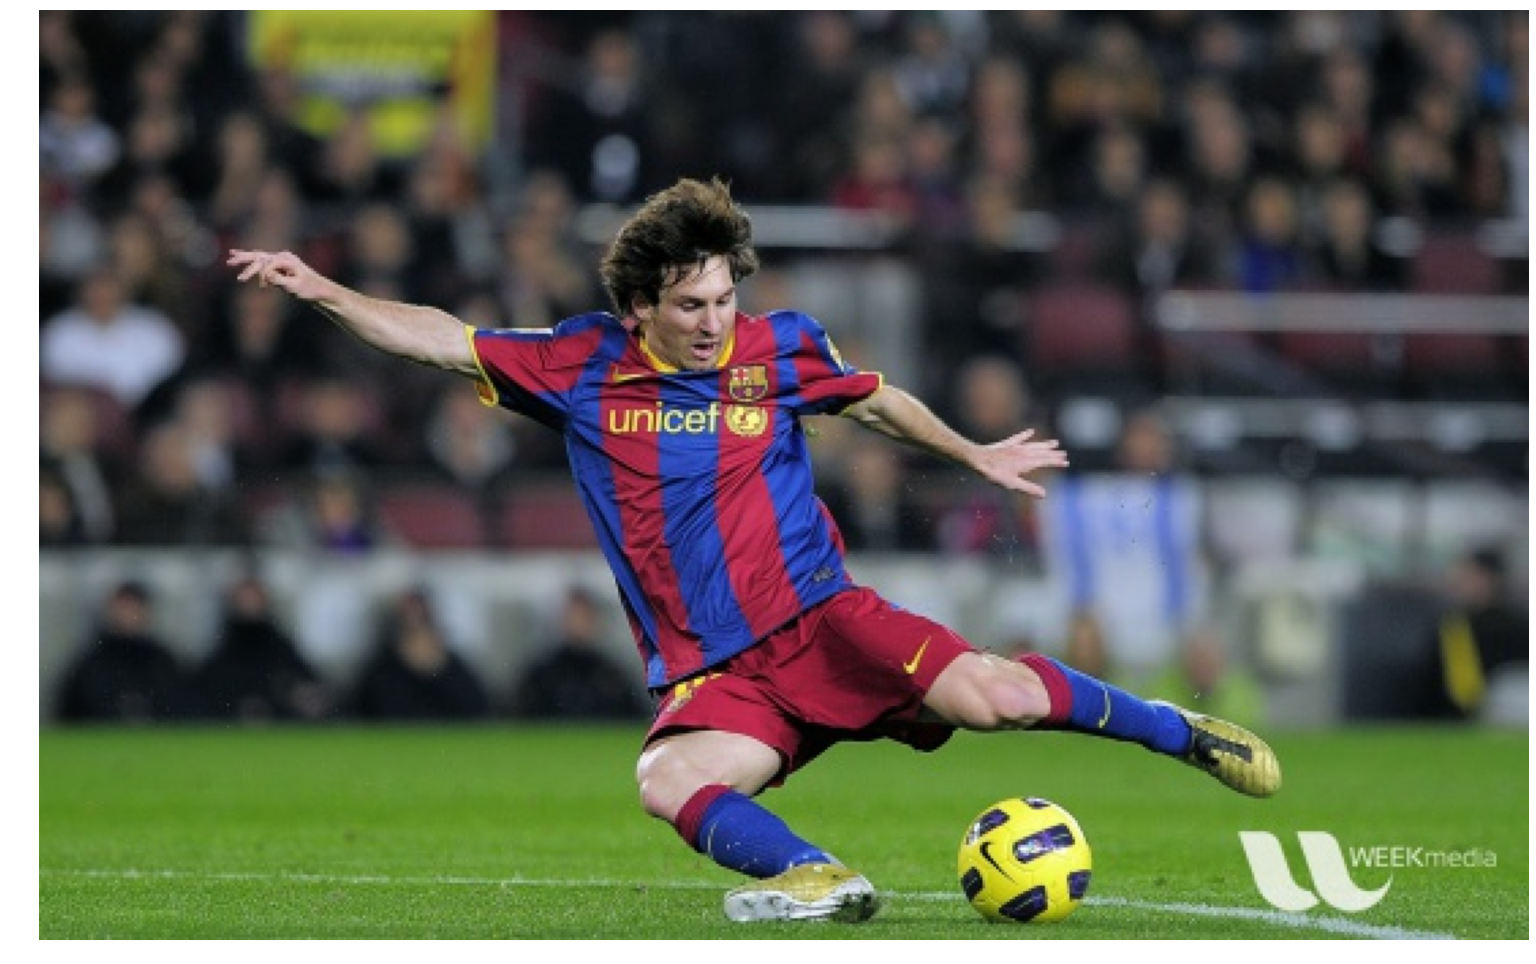

In [63]:
# zoom in (make bigger)
res = cv2.resize(messi, None, fx=4, fy=4, interpolation = cv2.INTER_AREA)
# slight use of matlab style api to avoid plt.subplots(1,1,...) call for just one axis 
plt.figure(figsize=size_me(res)) 
my_show(plt.gca(), res);

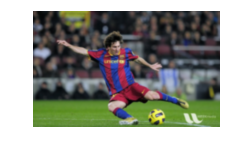

In [66]:
# zoom out (make smaller)
height, width = messi.shape[:2]
res = cv2.resize(messi, (int(.5*width), int(.5*height)), interpolation=cv2.INTER_LINEAR)

plt.figure(figsize=size_me(res))
my_show(plt.gca(), res)

Two primary types of transformations:
 * warpAffine:  2x3 matrix      (parallel lines stay parallel)
 * warpPerspective: 3x3 matrix

$x_{\text{shift}}$ is amount to the right (negative, indicates to the left)
$y_{\text{shift}}$ is amount down (negative indicates up)

$$M = 
\begin{bmatrix}
1 & 0 & x_{\text{shift}} \\
0 & 1 & y_{\text{shift}}
\end{bmatrix}
$$

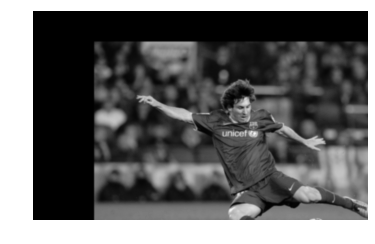

In [69]:
messi_gray = my_read_g(img_dir+'data/messi.jpg')

height, width = messi_gray.shape   # r,c -> x,y

x_shift, y_shift = 100, 50  

M = np.array([[1, 0, x_shift],
              [0, 1, y_shift]], dtype=np.float32)
res = cv2.warpAffine(messi_gray, M, (width, height)) # arguments in x,y terms

my_show(plt.gca(), res, cmap='gray')

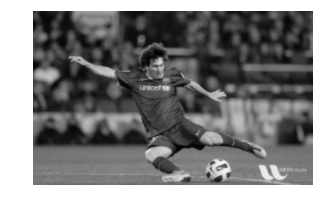

In [70]:
messi_gray = my_read_g(img_dir+'data/messi.jpg')

height, width = messi_gray.shape   # r,c -> x,y

scale_factor = 0.75

M = np.array([[scale_factor, 0, 0],
              [0, scale_factor, 0]], dtype=np.float32)
res = cv2.warpAffine(messi_gray, M, (int(width * scale_factor), 
                                     int(height * scale_factor))) # arguments in x,y terms

plt.figure(figsize=size_me(res))
my_show(plt.gca(), res, cmap='gray')

$$M = 
\begin{bmatrix}
\cos(\theta) & - \sin(\theta) \\
\sin(\theta) & \cos(\theta)
\end{bmatrix}$$

Becomes:


$$M = 
\begin{bmatrix}
 \alpha & \beta  & (1-\alpha) x_{\text{center}} -      \beta y_{\text{center}} \\
-\beta  & \alpha &      \beta x_{\text{center}} + (1-\alpha) x_{\text{center}}
\end{bmatrix}$$

$$\begin{align}
\alpha &= scale \cos(\theta) \\
\beta  &= scale \sin(\theta) 
\end{align}$$

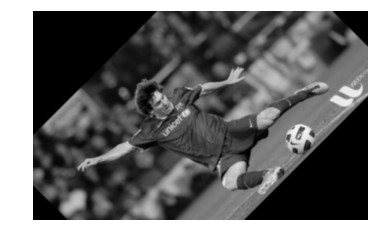

In [75]:
M = cv2.getRotationMatrix2D((width/2,height/2), 45, 1)
res = cv2.warpAffine(messi_gray, M, (width, height)) # args in xy terms (not rc terms)
my_show(plt.gca(), res, cmap='gray')

It is possible to define an affine transform by definine three before and after points.  With three points before and after a transform, the affine matrix can be inferred.

[[1.  0.  0. ]
 [0.5 0.5 0. ]]


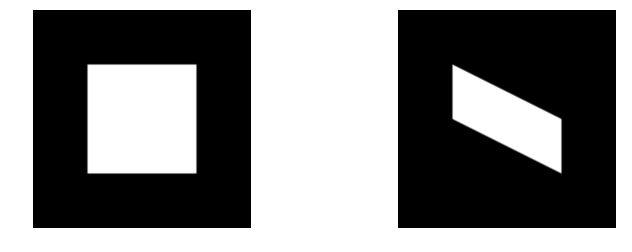

In [76]:
shape = (300,300)
orig = np.zeros(shape, dtype=np.uint8)
orig[75:225, 75:225] = 255

# NOTE:  play around with these to get a feel for what they do!
# args in xy terms (not rc terms)
pts1 = np.float32([[75,75], [75,225], [225,225]])
pts2 = np.float32([[75,75], [75,150], [225,225]])
M = cv2.getAffineTransform(pts1,pts2)
res = cv2.warpAffine(orig, M, shape)

print(M)

fig,axes = plt.subplots(1,2,figsize=(12,4))
my_show(axes[0], orig, cmap='gray')
my_show(axes[1], res, cmap='gray')

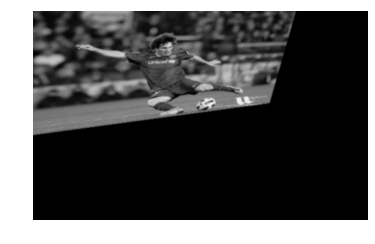

In [77]:
# perspective transform:  straight lines -> straight lines

# pts in r,c terms (:sadface:)
rows, cols = messi_gray.shape
pts1 = np.float32([[0,0],[rows-1,0], [0,cols-1], [rows-1, cols-1]])
pts2 = np.float32([[0,0],[300,0],[0,300],[250,250]])

M = cv2.getPerspectiveTransform(pts1,pts2)
res = cv2.warpPerspective(messi_gray, M, (cols, rows)) # r,c -> x,y terms

my_show(plt.gca(), res, cmap='gray')

# Exercises

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os, time

## Create a Series of Transition Image

Pick two images and create a series of 20 images that show a transition from the first image to the second.  You can investigate playing the images as a movie, but creating a video is beyond the scope of today's discussion.

In [4]:
#ml   = my_read(img_dir+'data/ml.png')
#frog = my_read(img_dir+'data/frog.jpg')
__author__ = 'abitran'

# first we define the folder that contains the images
my_folder = 'album'

# we create a blank image of the same dimension as the images inside de folder
imgfirst = np.zeros((1080, 810,3), np.uint8)

# we define the location of the folder
my_location = "./"+ my_folder

# we loop through the files inside the folder
for file in os.listdir(my_location):

# we read a file    
    img = cv2.imread(my_location + '/' + file)
    img= img.astype(np.uint8)
# blending formula from cv2 docs:
# dst = alpha*img1 + beta*img2 + gamma, where gamma = 0

# we create a loop from 1-10 (including 10) to apply alpha 
    for alpha in range(1, 11):

# we divide alpha by 10 to create a float
        alpha = alpha/10.0
# to create a transition effect, beta must be:
        beta = 1 - alpha
# we load the transition into the image canvas
        cv2.imshow('album', cv2.addWeighted(img, alpha, imgfirst, beta, 0.0))
        time.sleep(0.1)
        if cv2.waitKey(1) & 0xff == ord('q'):
            break
    if cv2.waitKey(3) & 0xff == ord('q'):
        break
# we assign the img to the first one
    imgfirst = img
cv2.waitKey(0)     
cv2.destroyAllWindows()

## Drawing

Open an image and draw a line and a circle on it.

Create a tiny image (10 pixels by 10 pixels) and use `cv2.line` to draw a line on it from the top-left corner to the midpoint of the right hand side.  Note that `cv2.line` is "thinking" in terms of (x,y) coordinates.  Show the resulting images with and without interpolation.  Look at the contents of the underlying array.  You might also play around with the `thickness` parameter.

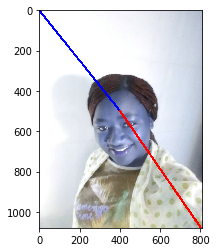

In [17]:
image=cv2.imread('album/1.jpeg')
# Window name in which image is displayed 
window_name = 'Image'
  
# Start coordinate, here (0, 0) 
# represents the top left corner of image 
start_point1 = (0, 0) 
start_point2 = (800, 1080) 
  
# End coordinate, here (250, 250) 
# represents the bottom right corner of image 
end_point1 = (400, 500)
end_point2 = (400, 500) 
  
# Green color in BGR 
color1 = (0, 0, 255) 
color2 = (255, 0, 0) 
  
# Line thickness of 9 px 
thickness = 9
  
# Using cv2.line() method 
# Draw a diagonal green line with thickness of 9 px 
image = cv2.line(image, start_point1, end_point1, color1, thickness) 
image = cv2.line(image, start_point2, end_point2, color2, thickness) 
  
# Displaying the image  
#cv2.imshow(window_name, image) 
plt.imshow(image, cmap='gray')


In [19]:
image[400,500]

array([62, 44, 45], dtype=uint8)

Now, use `np.where` to find the coordinates of the endpoints of the line you just drew.  Fortunately, the end points will be at the start and end of the returned values.  Unfortuantely, `np.where` thinking about indexing in terms of rows and columns (r,c).

Using the coordinates you extracted with `np.where`, draw a rectangle that covers the line.  Careful!  Do rows map to an x-coordinate or to a y-coordinate?  Surprise!

While this is a painful and annoying lesson, you only have to learn it once!

## Creating Test Images

From our square test image, uses a geometric transformation to create a diamond (a rotated squared).

## Working with RGB and Histograms

Take an image and create pairs of plots showing (1) a grayscale image for a given RGB color channel and (2) the normalized histogram for that channel.  You'll need to dig into the documentation for `plt.hist` and pay attention to the arguments for: (1) `weights`, (2) `bins`, and (3) `normed`. 

## Color Detection Exercise

Earlier, we developed a "blue detector" that could be used to find blue regions of an object.  Let's generalize that.   Write a function `inrange_hsv(img, hue, span)` that returns a mask for `img` that *keeps* hue values between $[h-span, h+span]$.  As we mentioned above, OpenCV uses values in $[0,179]$ to store hues.  And, the values are clock-like or modulo ... they wrap around.  Thus, the value 5 is effectively 10 points away from the value 175.  Taking this in to consideration, write `inrange_hsv` so that it will work for any input hue `hue`.  Hint:  keep making use of `inRange` as we did above, but consider using it multiple multiples times and combining the results.

Test it out by looking for "pure" red (RGB=(255,0,0)) in our friend, the apple.  Play around with the `span` to see what value lets you can capture the maximum apple with minimum background.

## Additional Exercise Ideas

  * Try different cv2 interpolators ... compare with mpl interpolators
  * Play around with differences between np.bitwise_and and cv2.bitwise_and
  * Use addWeighted and look at results with and w/o interpolation